<div style="
    background-color: #001f3f; 
    padding: 30px; 
    text-align: center; 
    font-family: 'Montserrat', sans-serif; 
    color: cyan;
    border-radius: 10px;
">
    <h1 style="font-size: 42px; font-weight: bold; letter-spacing: 2px; margin-bottom: 10px;">
        MARGINS OF GLORY
    </h1>
    <h3 style="font-weight: normal; margin: 0 0 20px 0;">
        A Football (Soccer) Analytics Project
    </h3>
    <h2 style="margin: 5px 0;">Saanit Bansal</h2>
    <p style="margin-top: 20px; font-size: 16px;">
        <a href="mailto:sb9300@nyu.edu" style="color: cyan; text-decoration: none; font-weight: bold;">📧 Email</a> |
        <a href="https://github.com/saanitbansal-619" style="color: cyan; text-decoration: none; font-weight: bold;">💻 GitHub</a> |
        <a href="https://www.linkedin.com/in/saanit-bansal-681874293" style="color: cyan; text-decoration: none; font-weight: bold;">🔗 LinkedIn</a> |
        <a href="https://public.tableau.com/views/MarginsofGlory/MARGINSOFGLORY?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link" style="color: cyan; text-decoration: none; font-weight: bold;">📊 Tableau</a>
    </p>
</div>


Welcome to **Margins of Glory**, a data-driven performance analysis of elite European football clubs, focused on what separates victory from defeat — not just goals, but the subtle margins: finishing quality, consistency under pressure, and xG dynamics.

This project combines:
- 📊 Advanced feature engineering in Python
- 📈 Tableau visualizations for team comparison
- 🤖 ML modeling to explore performance patterns

### 🧠 What’s this about?
Expected Goals (xG) is a modern football metric that quantifies the quality of scoring chances. But teams don't just win by outshooting opponents — they win by converting at the right moments. This project dives deeper, creating new metrics like:
- **Finishing Efficiency**
- **Clutch xG**
- **Consistency Score**

### 🌍 Why does it matter?
Even for non-football fans: This is a case study in real-world sports analytics — feature engineering, aggregation, and data storytelling. Think of it as a showcase of:
- Exploratory Data Analysis (EDA)
- Metric design for imperfect real-world data
- Preparation for visualization & ML


📁 This notebook contains:
1. Data Cleaning & Standardization
2. Feature Engineering of Advanced Metrics
3. Team-level Aggregation & Export for Tableau

Let’s dig into the margins that define glory.


## Table of Contents

1. 1.0 Introduction & Dataset Overview  
2. 2.1 Feature Engineering: Overperformance in Front of Goal  
3. 2.2 Feature Engineering: Finishing Efficiency & Clutch xG  
4. 2.3 Feature Engineering: Team-Level Summary Metrics
5. 2.4 Feature Engineering:  Advanced Finishing Metrics: Measuring Quality and Impact  
6. 2.5 Feature Engineering: Advanced Team-Level Metrics
7. Final Thoughts: Beyond the Scoreline
8. Key Outcomes


## 1.0 Introduction & Dataset Overview

This project analyzes match-by-match performance data for 15 of Europe’s top football clubs from the 2024–25 season. The goal is to understand how elite teams perform in the “margins” — where small differences in finishing, consistency, or pressure performance can separate the best from the rest.

### Dataset Creation:
- Manually scraped from FBref.com using CSV exports per team.
- Cleaned and combined into a single dataset (`AllTeams_Cleaned.csv`) with 500+ matches.
- Teams include major clubs from the Premier League, La Liga, Bundesliga, Serie A, and Ligue 1.

The raw dataset includes statistics like goals, xG, shots, and more — which we’ll transform into insightful performance metrics.

Key preprocessing steps included:
- Dropping irrelevant columns like match links
- Parsing dates and sorting chronologically
- Retaining only the most relevant columns for analysis


In [1]:
#Importing the required python libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def clean_and_merge_csvs(input_folder, team_names, output_file):
    all_teams_data = []

    for team in team_names:
        file_path = os.path.join(input_folder, f"{team} - Sheet1.csv")
        try:
            #Loading the CSV for each team
            df = pd.read_csv(file_path)

            # Dropping irrelevant columns
            df = df.drop(columns=["Match Report"], errors='ignore')

            # Converting numerics
            numeric_cols = [
                'GF', 'GA', 'Gls', 'Sh', 'SoT', 'SoT%', 'G/Sh', 'G/SoT',
                'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'
            ]
            df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

            # Deriving essential metrics
            df['Goal Diff'] = df['GF'] - df['GA']
            df['xG Overperformance'] = df['GF'] - df['xG']
            df['Result Category'] = df['Result'].map({'W': 'Win', 'D': 'Draw', 'L': 'Loss'})

            # Keeping only useful columns
            useful_cols = [
                'Date', 'Opponent', 'Venue', 'Round',
                'GF', 'GA', 'xG', 'npxG', 'G-xG', 'np:G-xG',
                'Sh', 'SoT', 'SoT%', 'G/Sh', 'G/SoT',
                'Goal Diff', 'xG Overperformance', 'Result Category'
            ]
            df_cleaned = df[useful_cols].copy()

            # Adding team name as the first column
            df_cleaned.insert(0, 'Team', team)

            # Parsing date and sorting later
            df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

            all_teams_data.append(df_cleaned)
            print(f"Cleaned data for {team}")

        except Exception as exp:
            print(f"Skipped data for {team}: {exp}")

    # Combining all data, sorting by date
    combined_df = pd.concat(all_teams_data, ignore_index=True)
    combined_df = combined_df.sort_values(by='Date')
    combined_df.to_csv(output_file, index=False)
    print(f"\nAll teams merged into: {output_file}")

In [3]:
# Creating a list of names of clubs, exactly as they have been saved in seperate CSVs
team_names = ['Liverpool', 'Manchester City', 'Arsenal', 'Chelsea', 'Barcelona', 'Real Madrid',
              'Bayern Munich', 'PSG', 'Napoli', 'Inter', 'Manchester Utd', 'Atletico Madrid', 'Tottenham', 'Milan', 'Juventus']

#Calling the function (raw_data is the name of the folder where all the individual CSVs are stored)
clean_and_merge_csvs("raw_data", team_names, "AllTeams_Cleaned.csv")

Cleaned data for Liverpool
Cleaned data for Manchester City
Cleaned data for Arsenal
Cleaned data for Chelsea
Cleaned data for Barcelona
Cleaned data for Real Madrid
Cleaned data for Bayern Munich
Cleaned data for PSG
Cleaned data for Napoli
Cleaned data for Inter
Cleaned data for Manchester Utd
Cleaned data for Atletico Madrid
Cleaned data for Tottenham
Cleaned data for Milan
Cleaned data for Juventus

All teams merged into: AllTeams_Cleaned.csv


## 2.1 Feature Engineering: Overperformance in Front of Goal

This section compares each team’s actual goals scored (GF) with their expected goals (xG). The difference — referred to as “overperformance” — indicates how clinical a team was in front of goal.


In [4]:
# Loading the cleaned master dataset
df = pd.read_csv("AllTeams_Cleaned.csv")

# Grouping by team and compute total goals vs expected goals
team_perf = df.groupby("Team")[["GF", "xG"]].sum()
team_perf["Overperformance"] = team_perf["GF"] - team_perf["xG"]

# Sorting teams by their overperformance
team_perf = team_perf.sort_values("Overperformance", ascending=False)

# Reseting index for further ease
team_perf = team_perf.reset_index()
team_perf

,Team,GF,xG,Overperformance
0,Bayern Munich,99,81.9,17.1
1,Inter,79,66.9,12.1
2,Barcelona,102,91.5,10.5
3,Arsenal,69,60.0,9.0
4,Juventus,58,50.9,7.1
5,Napoli,59,53.1,5.9
6,Tottenham,64,58.7,5.3
7,Manchester City,72,67.9,4.1
8,Liverpool,86,82.1,3.9
9,Atletico Madrid,68,64.6,3.4


### 🎯 Goals vs Expected Goals: Who's Overperforming?

This chart compares each team's actual goals scored (GF) against their expected goals (xG) to calculate **xG Overperformance**.

- **Positive Values**: Teams that scored more than expected — often a sign of clinical finishing or a hot streak.
- **Negative Values**: Teams that scored less than expected — may indicate poor finishing or unlucky outcomes.


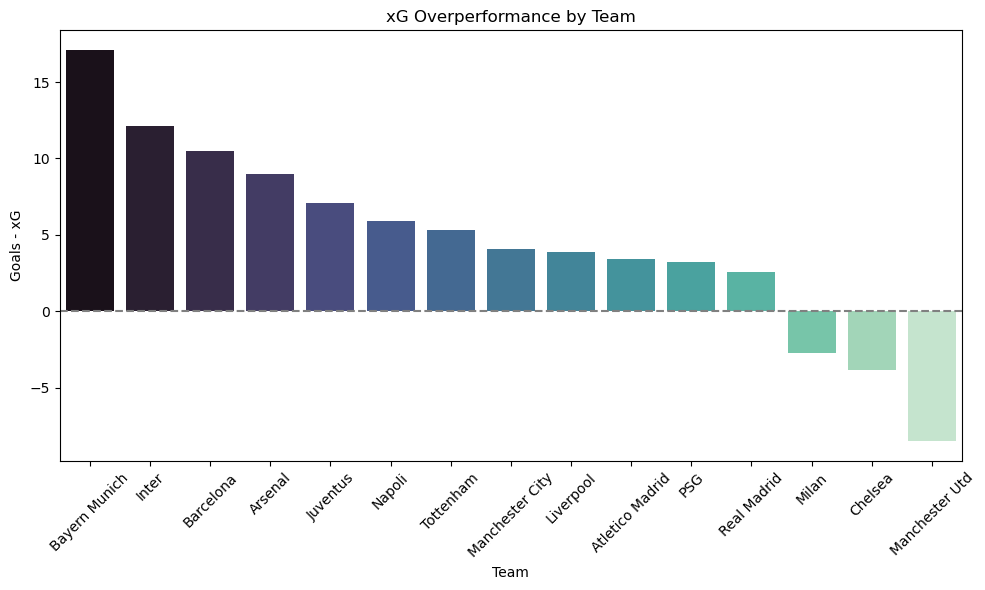

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=team_perf, x="Team", y="Overperformance", palette="mako")
plt.axhline(0, color='gray', linestyle='--')
plt.title("xG Overperformance by Team")
plt.ylabel("Goals - xG")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📊 Plot Analysis: xG Overperformance by Team (2024–25 Season)

This bar chart shows how each team performed relative to their expected goals (xG) during the 2024–25 season. A higher value indicates a team scored more than expected — a sign of clinical finishing, overachieving attackers, or even statistical variance (luck). Below are some key insights derived from the plot:

---

#### 🔴 1. Bayern Munich: Elite Finishing, Consistent Dominance
Bayern top the overperformance chart, outscoring their xG by a wide margin. This reflects not just lethal finishing from players like Harry Kane and Jamal Musiala, but also their ability to consistently create and convert high-quality chances — a theme seen repeatedly in the Bundesliga.

#### 🔵 2. Inter & Barcelona: Tactical Efficiency
Inter’s strong overperformance aligns with Simone Inzaghi’s direct approach — fewer but clearer chances. Barcelona, under Xavi, tend to dominate possession and overload the box, but this season they’ve translated that into sharper finishing — possibly due to improved form from attackers like Lewandowski or young breakout stars.

#### 🟢 3. Manchester United: Major Underperformance
United sit at the bottom, underperforming their xG significantly. This likely stems from inefficiencies in front of goal — poor shot selection, lack of composure, or underperforming forwards. Unfortunately, this mirrors past trends seen at the club in recent seasons.

#### 🔵 4. Chelsea & Milan: Creative but Wasteful
Both Chelsea and Milan created sufficient chances but failed to convert them efficiently, as seen in their negative overperformance. This supports the broader narrative around both teams lacking a consistent goal threat and struggling to turn buildup into goals.

---

This initial overperformance snapshot sets the stage for introducing deeper metrics like **Finishing Efficiency** and **Clutch xG**, which help separate teams that overperform due to skill vs. situational moments.


## 2.2 Feature Engineering: Finishing Efficiency & Clutch xG

To enrich our dataset with more insightful metrics, we define a function that adds two key features to each match:

- **Finishing Efficiency**: Combines a team’s goals per shot with their shooting accuracy to capture how clinically they finish chances.
- **Clutch xG**: Measures a team’s xG overperformance, but only in matches they won — quantifying performance in high-leverage situations.

This function processes the match-level DataFrame and returns it with the new columns added.


In [6]:
def add_finishing_and_clutch_metrics(df):
    """
    Adds Finishing Efficiency and Clutch xG metrics to a team's match-level DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame with match-level data. Must contain 'G/Sh', 'SoT%', 'xG', 'GF', and 'Result Category'.

    Returns:
        pd.DataFrame: Modified DataFrame with added 'Finishing Efficiency', 'xG Overperformance', and 'Clutch xG' columns.
    """
    df = df.copy()

    # Ensuring required columns are numeric to preven useless errors
    for col in ['G/Sh', 'SoT%', 'xG', 'GF']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Finishing Efficiency: (Goals per Shot) × (Shots on Target %)
    df['Finishing Efficiency'] = df['G/Sh'] * df['SoT%']

    # xG Overperformance: Goals For - Expected Goals
    df['xG Overperformance'] = df['GF'] - df['xG']

    # Clutch xG: Only consider overperformance in wins and sets rest of the posibilities to 0
    df['Clutch xG'] = np.where((df['Result Category'] == 'Win') & (df['xG Overperformance'] > 0), df['xG Overperformance'], 0)

    return df

In [7]:
#Calling the function and assigning it to clutch_df to create another CSV for the team based statistics only
clutch_df = add_finishing_and_clutch_metrics(df)
clutch_df.head(10)

,Team,Date,Opponent,Venue,Round,GF,GA,xG,npxG,G-xG,...,Sh,SoT,SoT%,G/Sh,G/SoT,Goal Diff,xG Overperformance,Result Category,Finishing Efficiency,Clutch xG
0,Manchester Utd,2024-08-16,Fulham,Home,Matchweek 1,1,0,2.4,2.4,-1.4,...,14,5,35.7,0.07,0.20,1,-1.4,Win,2.499,0.0
1,PSG,2024-08-16,Le Havre,Away,Matchweek 1,4,1,2.9,2.1,1.1,...,14,8,57.1,0.21,0.38,3,1.1,Win,11.991,1.1
2,Liverpool,2024-08-17,Ipswich Town,Away,Matchweek 1,2,0,2.6,2.6,-0.6,...,18,5,27.8,0.11,0.40,2,-0.6,Win,3.058,0.0
3,Arsenal,2024-08-17,Wolves,Home,Matchweek 1,2,0,1.2,1.2,0.8,...,18,6,33.3,0.11,0.33,2,0.8,Win,3.663,0.8
4,Milan,2024-08-17,Torino,Home,Matchweek 1,2,2,2.1,2.1,-0.1,...,26,5,19.2,0.08,0.40,0,-0.1,Draw,1.536,0.0
5,Barcelona,2024-08-17,Valencia,Away,Matchweek 1,2,1,3.2,2.4,-1.2,...,17,5,29.4,0.06,0.20,1,-1.2,Win,1.764,0.0
6,Inter,2024-08-17,Genoa,Away,Matchweek 1,2,2,1.9,1.9,0.1,...,17,7,41.2,0.12,0.29,0,0.1,Draw,4.944,0.0
7,Chelsea,2024-08-18,Manchester City,Home,Matchweek 1,0,2,1.0,1.0,-1.0,...,10,3,30.0,0.00,0.00,-2,-1.0,Loss,0.000,0.0
8,Real Madrid,2024-08-18,Mallorca,Away,Matchweek 1,1,1,0.6,0.6,0.4,...,13,5,38.5,0.08,0.20,0,0.4,Draw,3.080,0.0
9,Manchester City,2024-08-18,Chelsea,Away,Matchweek 1,2,0,0.8,0.8,1.2,...,11,5,45.5,0.18,0.40,2,1.2,Win,8.190,1.2


In [8]:
#Overwriting the master csv to include columns containing new metrics
clutch_df.to_csv('AllTeams_Cleaned.csv', index=False)

## 2.3 Feature Engineering: Team-Level Summary Metrics

To move beyond match-level insights, we aggregate key performance indicators for each team across the season. This summary table consolidates raw totals (like goals scored and xG) along with advanced metrics like:

- **xG Overperformance**: Total goals scored above expected.
- **Clutch xG**: The xG overperformance in matches that ended in wins — highlighting moments of impact.
- **Finishing Efficiency**: A derived metric combining goals per shot and shooting accuracy.
- **Per 90 Metrics**: Normalized indicators (e.g., G-xG per 90) to account for teams with different match counts.

This aggregated dataset will power the next layer of visualizations and comparisons, and it serves as a bridge between raw match data and high-level insights.


In [9]:
#Reading the master CSV
df_cleaned = pd.read_csv("AllTeams_Cleaned.csv")

# Ensuring numeric columns
df_cleaned[['GF', 'GA', 'xG', 'Goal Diff', 'xG Overperformance', 'Clutch xG', 'Finishing Efficiency']] = \
    df_cleaned[['GF', 'GA', 'xG', 'Goal Diff', 'xG Overperformance', 'Clutch xG', 'Finishing Efficiency']].apply(pd.to_numeric)

# Counting matches per team
match_counts = df_cleaned.groupby('Team').size().rename('Matches')

# Aggregating metrics for Team-Level Summary
agg_funcs = {
    'GF': 'sum',
    'GA': 'sum',
    'xG': 'sum',
    'Goal Diff': 'sum',
    'xG Overperformance': 'sum',
    'Clutch xG': 'sum',
    'Finishing Efficiency': 'mean'
}

# Calculating the aggregate metrics, grouping by the team names
summary = df_cleaned.groupby('Team').agg(agg_funcs)

# Merging match counts and calculating per 90 metrics
summary = summary.merge(match_counts, left_index=True, right_index=True)
summary['G-xG per 90'] = (summary['GF'] - summary['xG']) / summary['Matches']
summary['Clutch Index'] = summary['Clutch xG'] / summary['Matches']
summary['Avg Finishing Efficiency'] = summary['Finishing Efficiency']

# Renaming columns for better readability
summary = summary.rename(columns={
    'GF': 'Goals For',
    'GA': 'Goals Against',
    'xG': 'Expected Goals',
    'Goal Diff': 'Total Goal Diff',
    'xG Overperformance': 'Total xG Overperformance',
    'Clutch xG': 'Total Clutch xG'
})

# Arranging the sequence of columns in the database
summary = summary[[
    'Goals For', 'Expected Goals', 'Goals Against', 'Total Goal Diff',
    'Total xG Overperformance', 'Total Clutch xG', 'Matches',
    'G-xG per 90', 'Clutch Index', 'Avg Finishing Efficiency'
]]

#Reseting the index for further ease
summary.reset_index()

,Team,Goals For,Expected Goals,Goals Against,Total Goal Diff,Total xG Overperformance,Total Clutch xG,Matches,G-xG per 90,Clutch Index,Avg Finishing Efficiency
0,Arsenal,69,60.0,34,35,9.0,16.8,38,0.236842,0.442105,5.071500
1,Atletico Madrid,68,64.6,30,38,3.4,16.0,38,0.089474,0.421053,6.337158
2,Barcelona,102,91.5,39,63,10.5,23.9,38,0.276316,0.628947,6.298579
3,Bayern Munich,99,81.9,32,67,17.1,23.6,34,0.502941,0.694118,5.786059
4,Chelsea,64,67.8,43,21,-3.8,11.9,38,-0.100000,0.313158,4.052421
5,Inter,79,66.9,35,44,12.1,18.7,38,0.318421,0.492105,5.049947
6,Juventus,58,50.9,35,23,7.1,11.7,38,0.186842,0.307895,4.260368
7,Liverpool,86,82.1,41,45,3.9,12.9,38,0.102632,0.339474,5.093842
8,Manchester City,72,67.9,44,28,4.1,16.8,38,0.107895,0.442105,5.132868
9,Manchester Utd,44,52.5,54,-10,-8.5,11.3,38,-0.223684,0.297368,2.919763


## 2.4 Feature Engineering:  Advanced Finishing Metrics: Measuring Quality and Impact

To go beyond raw goal counts, we introduce two advanced metrics that evaluate both efficiency and situational value in front of goal:

- **Finishing Efficiency**: Calculated as `(Goals per Shot) × (Shot Accuracy)`, this captures how clinically a team converts its chances. It reveals whether a team is just creating a lot or actually finishing well.
  
- **Clutch xG per Match**: This measures how much of a team’s xG overperformance occurred in matches they won — essentially quantifying "impact finishing" that contributed directly to victories.

The charts below rank teams across the 2024–25 season on these two dimensions, offering a deeper look into their offensive execution.


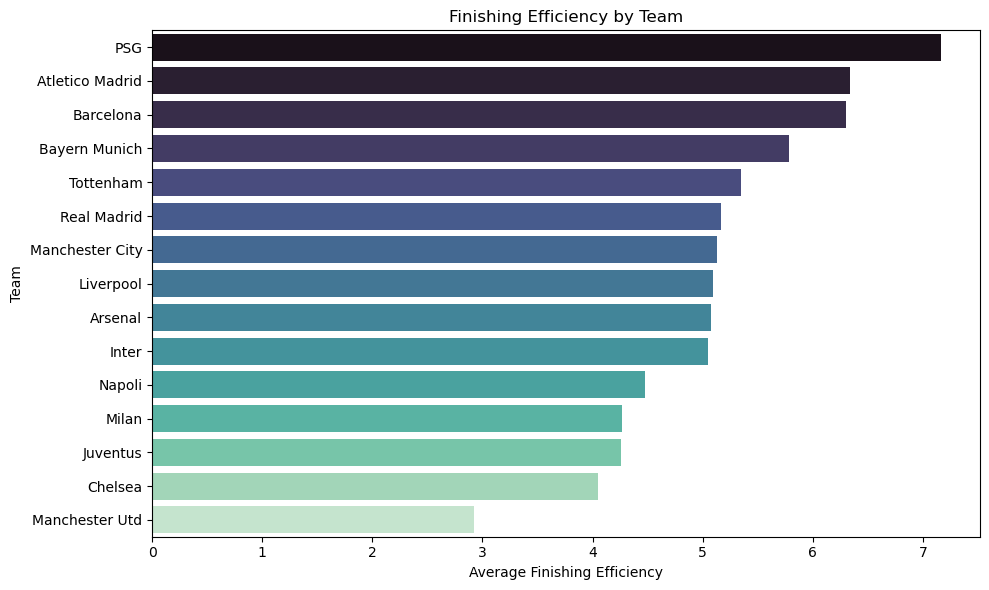

In [10]:
df_plot = summary.reset_index().sort_values("Avg Finishing Efficiency", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_plot,
    x="Avg Finishing Efficiency",
    y="Team",
    palette= "mako"
)
plt.title("Finishing Efficiency by Team")
plt.xlabel("Average Finishing Efficiency")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


### 📊 Key Insights from Finishing Efficiency

1. ✅ **PSG: Near-Sextuple Season Driven by Ruthless Finishing**  
   PSG top the finishing efficiency rankings — a reflection of their clinical edge throughout a nearly historic campaign. They came close to securing a sextuple, winning multiple domestic trophies and even champions league. Players like Vitinha, Ousmane Dembélé, and a fit-again Nuno Mendes played pivotal roles in maintaining attacking sharpness and sustaining pressure in the final third. Their high efficiency reflects a well-oiled, team-based scoring machine.

2. 🔴 **Atlético Madrid & Barcelona: Compact Strategy Meets Sharp Execution**  
   Atlético Madrid's efficiency reflects Diego Simeone’s pragmatic approach: creating fewer but higher-quality chances and converting them reliably. Barcelona, with their possession-dominant model, have shown improved finishing this season — driven by the maturity of youth like Lamine Yamal and the creative flair of Raphinha. Their position highlights a balance between structure and attacking execution.

3. ⚠️ **Manchester United: Efficiency Crisis Continues**  
   United rank at the bottom, once again underperforming in terms of finishing efficiency. This continues a frustrating trend. Despite switching managers, the team’s inability to finish consistently has undermined progress and cost points in key moments across the season, attributed mainly to their poor attacking form.



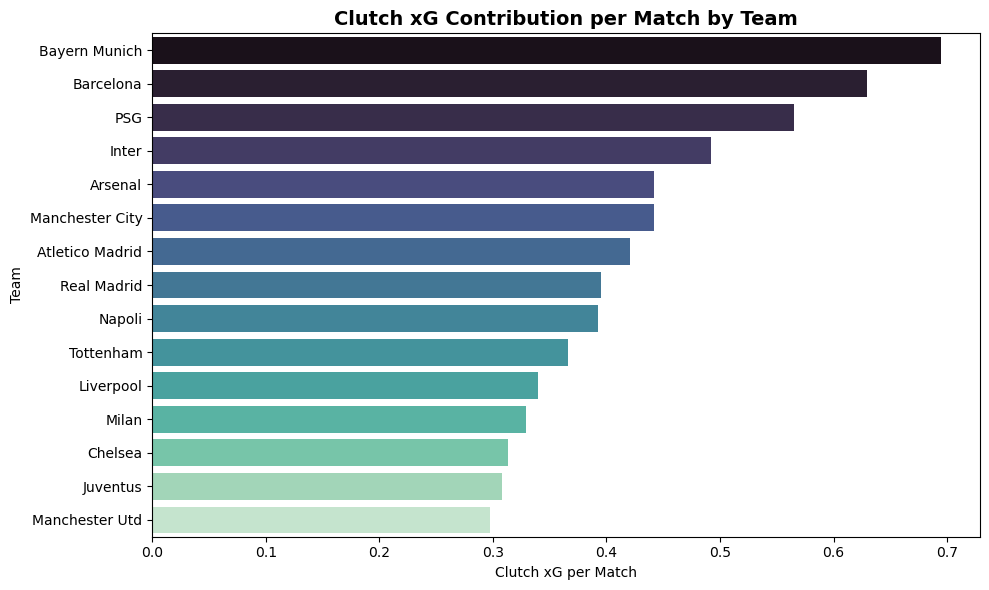

In [11]:
# Ensure sorting and palette
df_plot = summary.reset_index().sort_values("Clutch Index", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_plot,
    x="Clutch Index",
    y="Team",
    palette="mako"
)
ax.set_title("Clutch xG Contribution per Match by Team", fontsize=14, fontweight='bold')
ax.set_xlabel("Clutch xG per Match")
ax.set_ylabel("Team")
plt.tight_layout()
plt.show()


### 🎯 Clutch xG Contribution: Delivering Under Pressure

1. 🏆 **Bayern Munich: Kane and Müller Turn Up Late**  
   Bayern top the Clutch xG rankings — driven by Harry Kane’s game-winning goals and Thomas Müller’s timeless knack for late impact. It paid off, with Kane finally lifting his first major trophy this season.

2. 🔵 **Barcelona & PSG: Super Subs, Super Impact**  
   Both clubs thrived in key moments thanks to depth. Players like Gavi and Ferran Torres for Barça, and Gonçalo Ramos or Barcola for PSG, often made the difference off the bench in tight games.

3. 🔻 **Manchester United: Absent in Big Moments**  
   United once again lag behind, showing minimal clutch contribution per match. Their inability to influence matches late on remains a glaring weakness across the season.


## 2.5 Feature Engineering: Advanced Team-Level Metrics

The following functions introduce nuanced performance metrics that go beyond traditional stats, helping to profile teams more holistically:

- **Consistency Score**: Measures how stable a team's xG output is across matches. Lower standard deviation of xG implies higher consistency in attacking performance.
- **Conversion Rate Quality**: Evaluates how efficiently a team converts chances into goals, relative to the league average.
- **Momentum Score**: Captures recent form by weighing wins against losses in the last five games — a quick indicator of a team’s short-term trajectory.
- **Performance Volatility**: Assesses the variability in a team's G-xG values, highlighting how unpredictable or erratic their finishing outcomes have been.

These metrics enrich team evaluation by blending statistical stability, efficiency, form, and variance — ideal for scouting, power rankings, or predictive modeling.

In [12]:
# Writing function definitions for these deep metrics, which are often overlooked

def compute_consistency_score(input_df, output_df):
    team_std = input_df.groupby('Team')['xG'].std()
    output_df['xG Std Dev'] = output_df['Team'].map(team_std)
    output_df['Consistency Score'] = 1 / (1 + output_df['xG Std Dev'])  # Lower std → higher consistency
    return output_df
    
def compute_conversion_rate_quality(input_df, output_df):
    team_cr = input_df.groupby('Team').apply(lambda x: x['GF'].sum() / x['Sh'].sum())
    league_avg_cr = input_df['GF'].sum() / input_df['Sh'].sum()
    output_df['Conversion Rate Quality'] = output_df['Team'].map(team_cr) / league_avg_cr
    return output_df

def compute_momentum_score(input_df, output_df, window=5):
    recent = input_df.sort_values(by='Date').groupby('Team').tail(window)
    momentum = recent.groupby('Team')['Result Category'].apply(lambda x: (x == 'Win').sum() - (x == 'Loss').sum())
    output_df['Momentum Score'] = output_df['Team'].map(momentum).fillna(0)
    return output_df

def compute_performance_volatility(input_df, output_df):
    volatility = input_df.groupby('Team')['G-xG'].std()
    output_df['Performance Volatility'] = output_df['Team'].map(volatility)
    return output_df

In [13]:
#Calling these 4 functions 
summary = summary.reset_index()
compute_consistency_score(df_cleaned, summary)
compute_conversion_rate_quality(df_cleaned, summary)
compute_momentum_score(df_cleaned, summary, window=5)
compute_performance_volatility(df_cleaned, summary)

,Team,Goals For,Expected Goals,Goals Against,Total Goal Diff,Total xG Overperformance,Total Clutch xG,Matches,G-xG per 90,Clutch Index,Avg Finishing Efficiency,xG Std Dev,Consistency Score,Conversion Rate Quality,Momentum Score,Performance Volatility
0,Arsenal,69,60.0,34,35,9.0,16.8,38,0.236842,0.442105,5.071500,0.826964,0.547356,0.989107,1,1.150212
1,Atletico Madrid,68,64.6,30,38,3.4,16.0,38,0.089474,0.421053,6.337158,1.096185,0.477057,1.145304,2,1.133945
2,Barcelona,102,91.5,39,63,10.5,23.9,38,0.276316,0.628947,6.298579,1.135991,0.468167,1.187185,3,1.294372
3,Bayern Munich,99,81.9,32,67,17.1,23.6,34,0.502941,0.694118,5.786059,1.027314,0.493263,1.213867,4,1.214342
4,Chelsea,64,67.8,43,21,-3.8,11.9,38,-0.100000,0.313158,4.052421,1.015162,0.496238,0.845904,3,1.111162
5,Inter,79,66.9,35,44,12.1,18.7,38,0.318421,0.492105,5.049947,0.709983,0.584801,1.090364,2,1.115624
6,Juventus,58,50.9,35,23,7.1,11.7,38,0.186842,0.307895,4.260368,0.584733,0.631021,0.888593,3,0.875269
7,Liverpool,86,82.1,41,45,3.9,12.9,38,0.102632,0.339474,5.093842,0.942836,0.514711,1.049519,-1,0.953637
8,Manchester City,72,67.9,44,28,4.1,16.8,38,0.107895,0.442105,5.132868,0.807455,0.553264,0.931125,4,1.078000
9,Manchester Utd,44,52.5,54,-10,-8.5,11.3,38,-0.223684,0.297368,2.919763,0.771399,0.564525,0.654808,-2,1.195133


In [16]:
#Rounding off all the numeric values to 2 decimal places
summary = summary.round(2)
#Creating a new CSV using the summary dataframe
summary.to_csv("AllTeams_FeatureEngineering.csv", index = False)

---

## 3.0 Final Thoughts: Beyond the Scoreline

This project set out to go deeper than just goals, assists, and clean sheets — instead focusing on how teams behave, evolve, and outperform (or underperform) expectations. From building custom metrics like Finishing Efficiency and Clutch xG to adding behavioral layers like consistency and volatility, the goal has been to quantify football's intangibles.

What emerged is a richer view of the **2024–25 season** — one where context matters as much as outcome. We saw teams winning not just because they scored more, but because they were more efficient, consistent, or timely with their moments. Others struggled not for lack of effort, but due to misfiring execution or wild swings in finishing.

The final metrics are not meant to predict trophies or rank teams blindly. They serve to highlight dimensions of performance that often go unnoticed — momentum shifts, psychological patterns, finishing variance, and tactical sharpness. These tools are modular and can be adapted to player-level analysis, season-over-season comparisons, or deeper strategic studies.

Whether you're a data scientist, an analyst, a coach, or just a fan — this notebook aims to demonstrate how thoughtful feature engineering and football understanding can come together to build something insightful and replicable.

**And as the beautiful game keeps evolving, so will the data — and how we tell its story.**


---


## Key Outcomes
- Clean dataset with 100% valid values.
- Added multiple engineered features.
- Exported ready-to-use CSV for dashboard creation.